In [160]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

In [139]:
covid19_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv")

In [140]:
covid19 = covid19.T

In [141]:
covid19
new_header = covid19.iloc[0]

In [143]:
for i, cell in enumerate(covid19.iloc[0]):
    covid19.iloc[0][i] = str(str(covid19.iloc[0][i]) + ", ").replace("nan, ", "") + str(covid19.iloc[1][i])

In [144]:
covid19.iloc[0][0]

'Anhui, Mainland China'

In [145]:
covid19.columns = new_header
covid19 = covid19.drop(['Country/Region','Lat','Long', 'Province/State'])

In [146]:
covid19.rename(columns={'Province/State': 'Date'}, inplace=True)

In [147]:
covid19.index = pd.to_datetime(covid19.index)

In [148]:
covid19

Province/State,"Anhui, Mainland China","Beijing, Mainland China","Chongqing, Mainland China","Fujian, Mainland China","Gansu, Mainland China","Guangdong, Mainland China","Guangxi, Mainland China","Guizhou, Mainland China",HaiMainland China,"Hebei, Mainland China",...,"Bergen County, NJ, US","Harris County, TX, US","San Francisco County, CA, US",South Africa,"Clark County, NV, US","Fort Bend County, TX, US","Grant County, WA, US","Queens County, NY, US","Santa Rosa County, FL, US","Williamson County, TN, US"
2020-01-22,1,14,6,1,0,26,2,1,4,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,9,22,9,5,2,32,5,3,5,1,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,15,36,27,10,2,53,23,3,8,2,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,39,41,57,18,4,78,23,4,19,8,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,60,68,75,35,7,111,36,5,22,13,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,70,80,110,59,14,151,46,7,33,18,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,106,91,132,80,19,207,51,9,40,33,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,152,111,147,84,24,277,58,9,43,48,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,200,114,182,101,26,354,78,12,46,65,...,0,0,0,0,0,0,0,0,0,0
2020-01-31,237,139,211,120,29,436,87,29,52,82,...,0,0,0,0,0,0,0,0,0,0


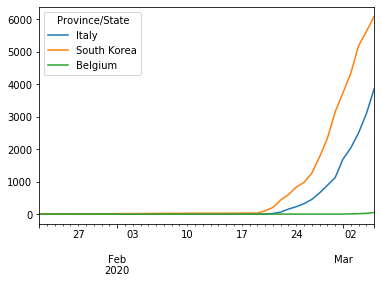

In [152]:
covid19[["Italy", "South Korea", "Belgium"]].plot()

In [156]:
china = [column for column in covid19.columns if 'China' in column]

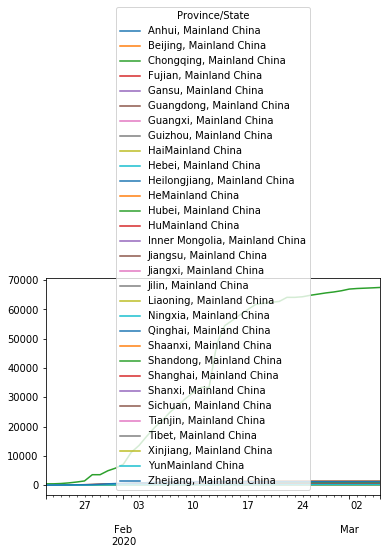

In [161]:
covid19[china].plot()

In [199]:
hubei = covid19["Hubei, Mainland China"]

In [210]:
hubei = np.array(hubei)[0:20].astype(float)

In [211]:
hubei
x = np.arange(0, len(hubei)).astype(float)

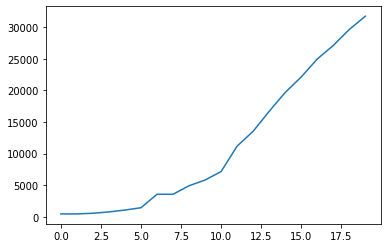

In [212]:
plt.plot(x, hubei)

In [213]:
np.polyfit(x, hubei, 2)
p2 = np.poly1d(np.polyfit(x, hubei, 2))
p2

poly1d([ 97.87975621, -84.53867624,  25.71753247])

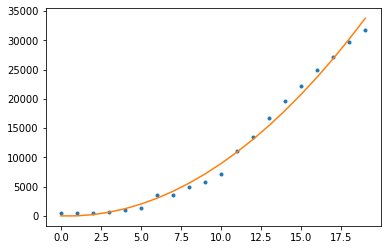

In [214]:
plt.plot(x, hubei, '.', x, p2(x), '-')

In [218]:
import scipy.stats as stats

In [226]:
r, p = stats.pearsonr(hubei, p2(x))
r

0.995729477032774

In [254]:
italy = covid19["Italy"]

In [255]:
italy = np.array(italy)[29:].astype(float)

In [256]:
italy

array([3.000e+00, 2.000e+01, 6.200e+01, 1.550e+02, 2.290e+02, 3.220e+02,
       4.530e+02, 6.550e+02, 8.880e+02, 1.128e+03, 1.694e+03, 2.036e+03,
       2.502e+03, 3.089e+03, 3.858e+03])

In [257]:
x = np.arange(0, len(italy)).astype(float)

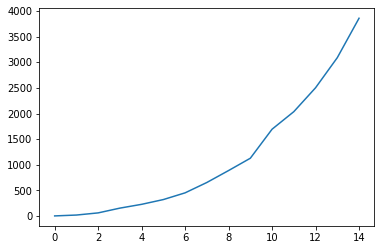

In [258]:
plt.plot(x, italy)

In [260]:
np.polyfit(x, italy, 2)
p2 = np.poly1d(np.polyfit(x, italy, 2))
p2

poly1d([  25.60496122, -102.8801713 ,  127.15882353])

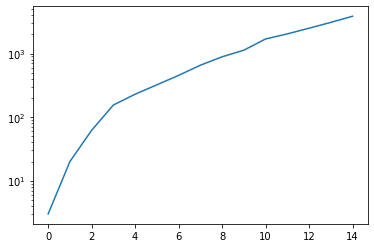

In [265]:
plt.plot(x, italy)
plt.yscale('log')

In [263]:
r, p = stats.pearsonr(italy, p2(x))
r

0.9975232690265976